In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Notes:
# globaal idee van wat voor soort experimenten we doen
# ?Beschrijven van algemeenheden van experimenten
# Fine-tuning base10 - different configs & hours - WER
# -Different values for lm-weight blabla
# Fine-tuning xlsr - difference with base10 - WER
# Shifting subtitles - difference without shifting - xlsr + base10 - WER
# Other stuff
# -Use of interpunction
# -Eh cases
# -Summarizing information
# -Equal LM model for asr + my model

In [4]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

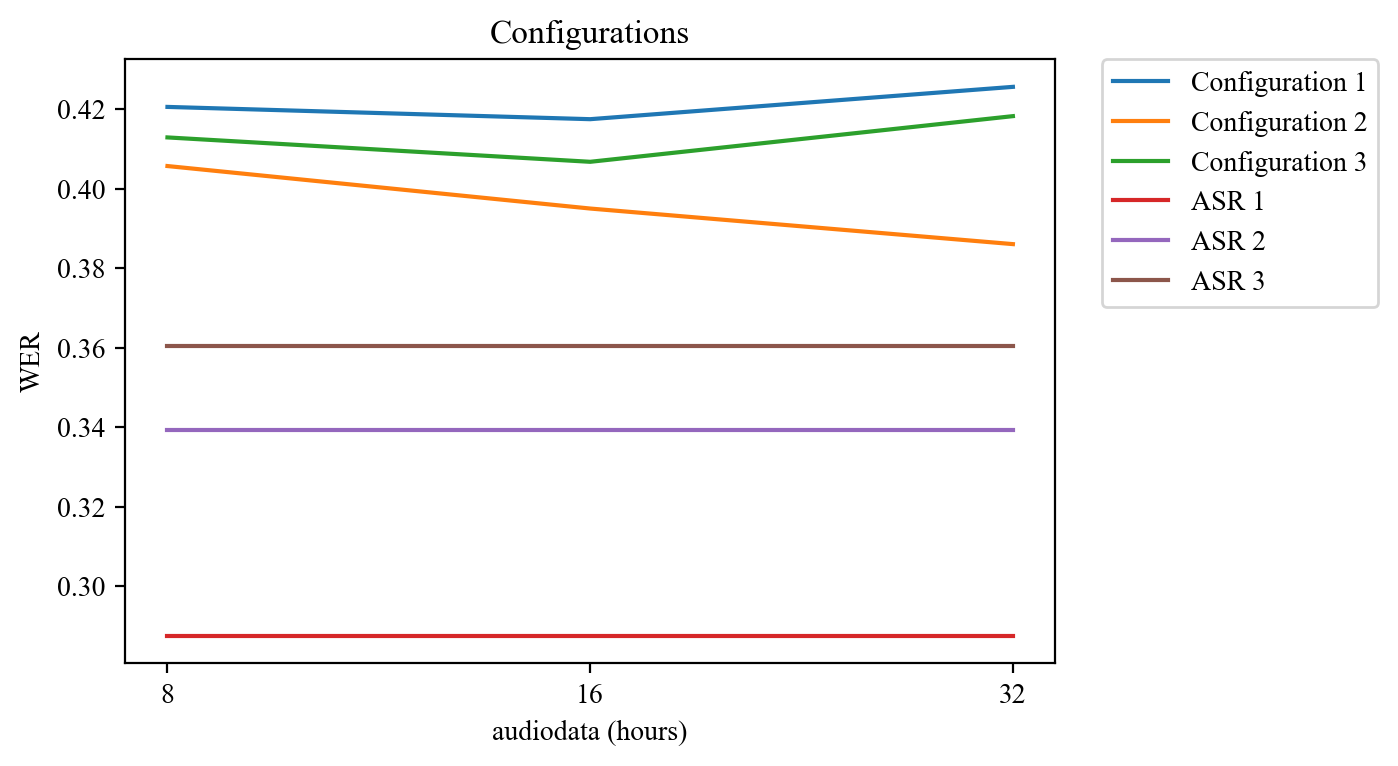

In [5]:
# Fine-tuning base10 - different configs & hours - WER

# config1: [2021-11-11/18-12-54, 2021-11-12/10-12-27, 2021-11-12/10-34-58]
# config2: [2021-11-14/15-14-42, 2021-11-14/15-23-43, 2021-11-14/15-30-40]
# config3: [2021-11-15/11-44-06, 2021-11-15/11-45-07, 2021-11-15/13-23-43]

# testset: 'test'
# normal
data = {
        'Configuration 1': [0.4205669671663695, 0.41747871716981055, 0.42561384172120553], #0:50:32.936000
        'Configuration 2': [0.4056876739594236, 0.3949950689869304, 0.3860400177398728], #1:06:01.672000
        'Configuration 3': [0.4128892392107573, 0.4067541928500564, 0.41824517531907135], #1:00:00.798000
        'ASR 1': [0.2874460738421658, 0.2874460738421658, 0.2874460738421658],
        'ASR 2': [0.33927041341867675, 0.33927041341867675, 0.33927041341867675],
        'ASR 3': [0.36049485629530365, 0.36049485629530365, 0.36049485629530365]
       }

# testset: 'test'
# weird: model config1 tested on config2 testset
data2 = {
        'Configuration 1': [0.48873507856770765, 0.47082425935335026, 0.4809520257377578],
        'Configuration 2': [0.4056876739594236, 0.3949950689869304, 0.3860400177398728],
        'Configuration 3': [0.4128892392107573, 0.4067541928500564, 0.41824517531907135],
        'ASR 1': [0.33927041341867675, 0.33927041341867675, 0.33927041341867675],
        'ASR 2': [0.33927041341867675, 0.33927041341867675, 0.33927041341867675],
        'ASR 3': [0.36049485629530365, 0.36049485629530365, 0.36049485629530365]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Configurations')
plt.xlabel('audiodata (hours)')
plt.ylabel('WER')
plt.xticks(list(range(3)), [8, 16, 32])
plt.show()

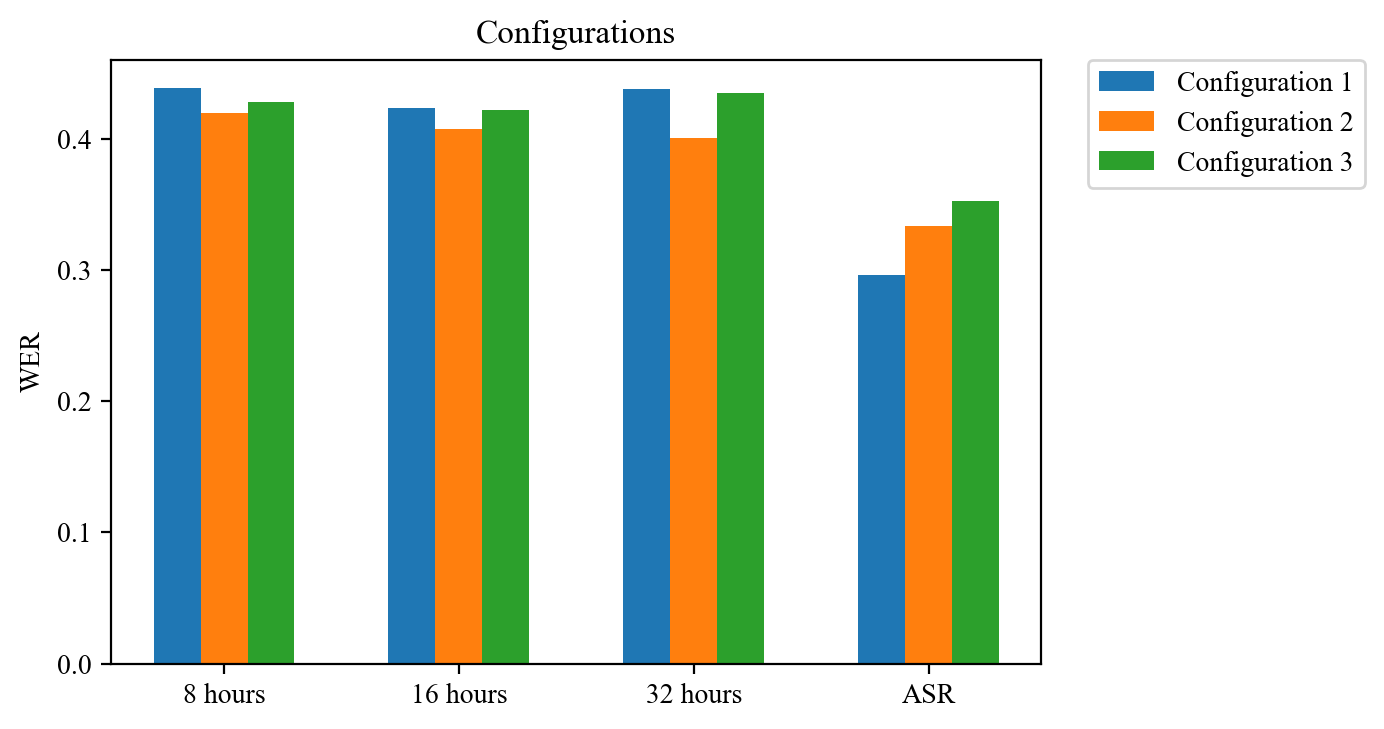

In [6]:
# old garbage
# data = {
#         'Configuration 1': [0.4205669671663695, 0.41747871716981055, 0.42561384172120553, 0.2874460738421658], #0:50:32.936000
#         'Configuration 2': [0.4056876739594236, 0.3949950689869304, 0.3860400177398728, 0.33927041341867675], #1:06:01.672000
#         'Configuration 3': [0.4128892392107573, 0.4067541928500564, 0.41824517531907135, 0.36049485629530365] #1:00:00.798000
#        }
data = {
        'Configuration 1': [0.4383145091225022, 0.4236895453229076, 0.4377353026353895, 0.2961193165363452], #0:50:32.936000
        'Configuration 2': [0.41932579773932177, 0.4070221066319896, 0.40082024607382216, 0.3334000200060018], #1:06:01.672000
        'Configuration 3': [0.42803638309256287, 0.42215088282504015, 0.4348849652220439, 0.35280898876404493] #1:00:00.798000
        }
labels = ['8 hours', '16 hours', '32 hours', 'ASR']
colors = ['r', 'g', 'b']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)

ax.set_ylabel('WER')
ax.set_title('Configurations')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

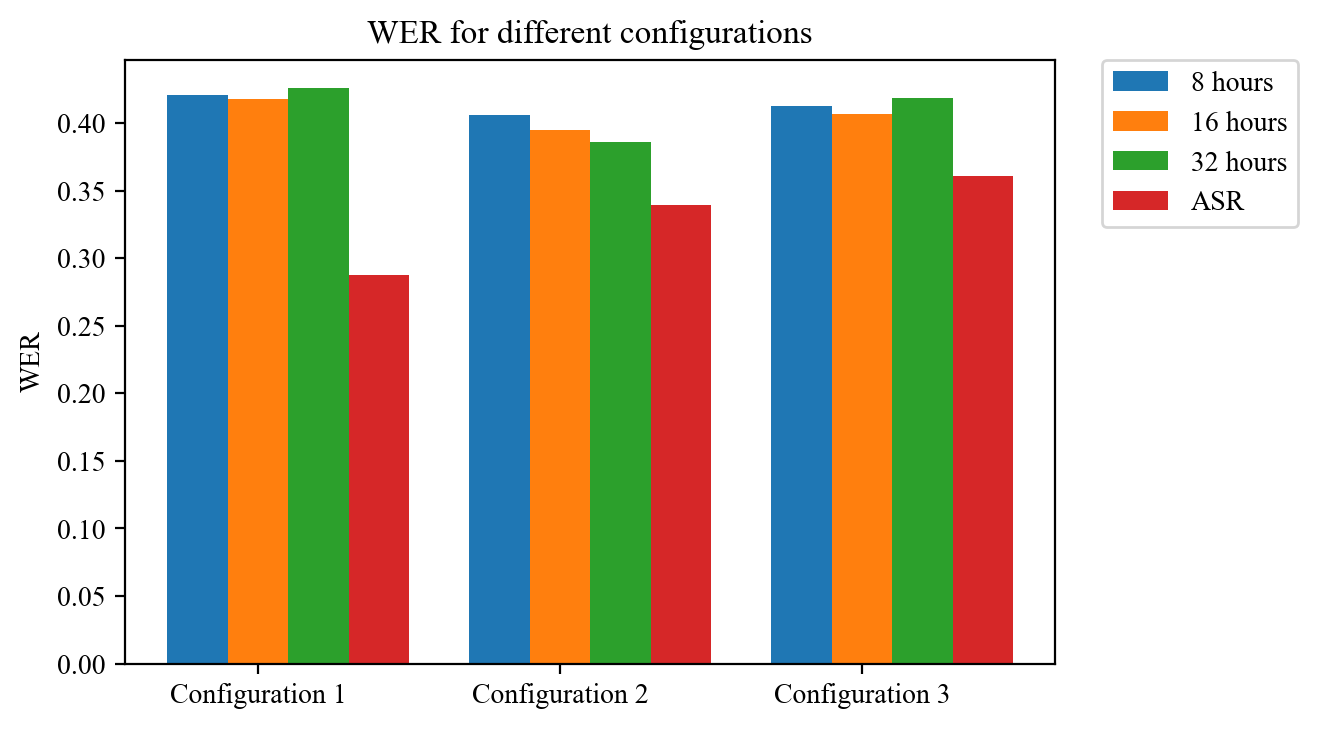

In [7]:
data = {
        '8 hours': [0.4205669671663695, 0.4056876739594236, 0.4128892392107573],
        '16 hours': [0.41747871716981055, 0.3949950689869304, 0.4067541928500564],
        '32 hours': [0.42561384172120553, 0.3860400177398728, 0.41824517531907135],
        'ASR': [0.2874460738421658, 0.33927041341867675, 0.36049485629530365]
       }
labels = ['Configuration 1', 'Configuration 2', 'Configuration 3']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)

ax.set_ylabel('WER')
ax.set_title('WER for different configurations')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

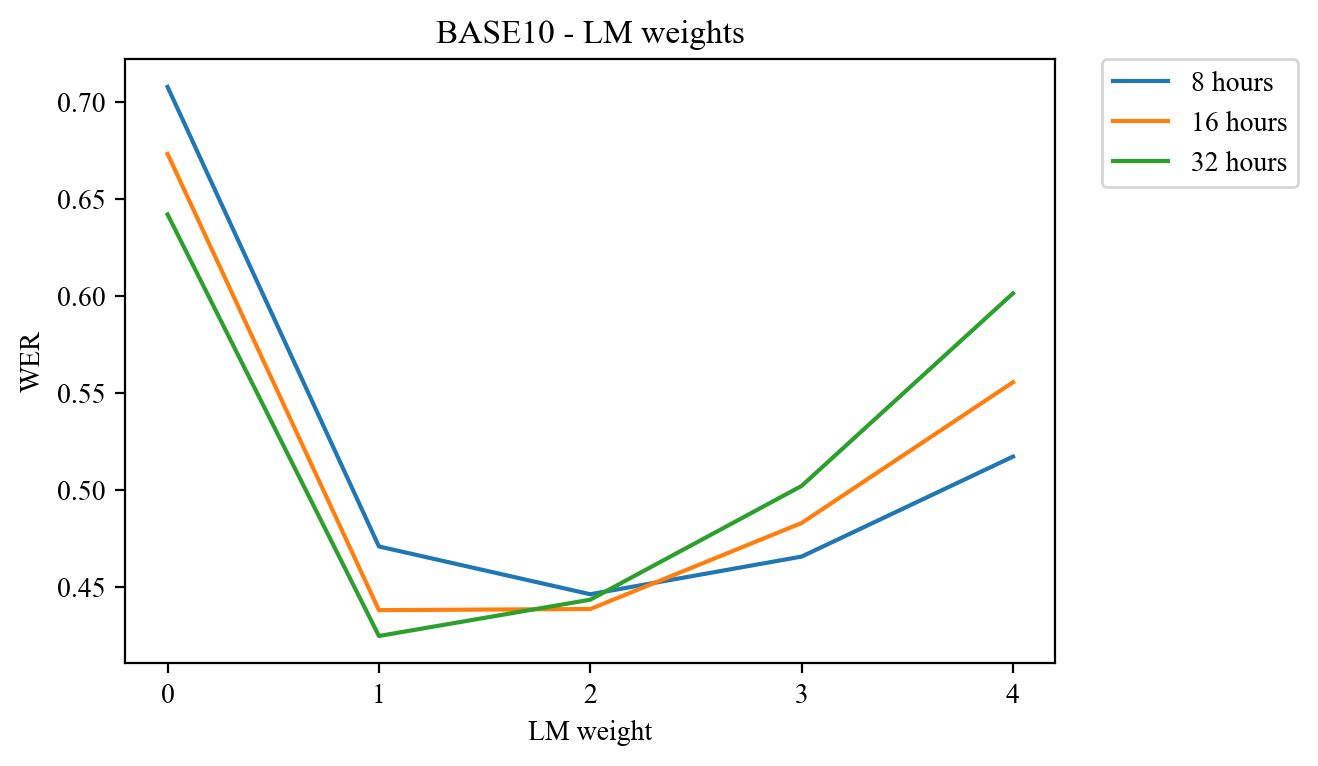

In [8]:
# Fine-tuning base10 - different LM weights - WER

# old garbage
# testset: 'test'
# data = {
#         '8 hours': [0.761000050797186, 0.437965417823946, 0.4056876739594236, 0.42867886608509326, 0.47918766069859703],
#         '16 hours': [0.7006993540139026, 0.39108805574562105, 0.3949950689869304, 0.4386549401847224, 0.5069587699190442],
#         '32 hours': [0.6611997912770066, 0.35983920737067104, 0.3860400177398728, 0.44999524443073224, 0.5491314196366458]
#        }
# testset: 'test'
data = {
        '8 hours': [0.7077123136941083, 0.4709412823847154, 0.44633390017005103, 0.465739721916575, 0.5172551765529659],
        '16 hours': [0.6732019605881765, 0.43813143943182953, 0.43873161948584577, 0.4830449134740422, 0.5555666700010004],
        '32 hours': [0.6419925977793338, 0.42482744823447033, 0.44353305991797537, 0.5021506451935581, 0.6013804141242373]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
plt.title('BASE10 - LM weights')
plt.xlabel('LM weight')
plt.ylabel('WER')
plt.xticks(list(range(5)), [0, 1, 2, 3, 4])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

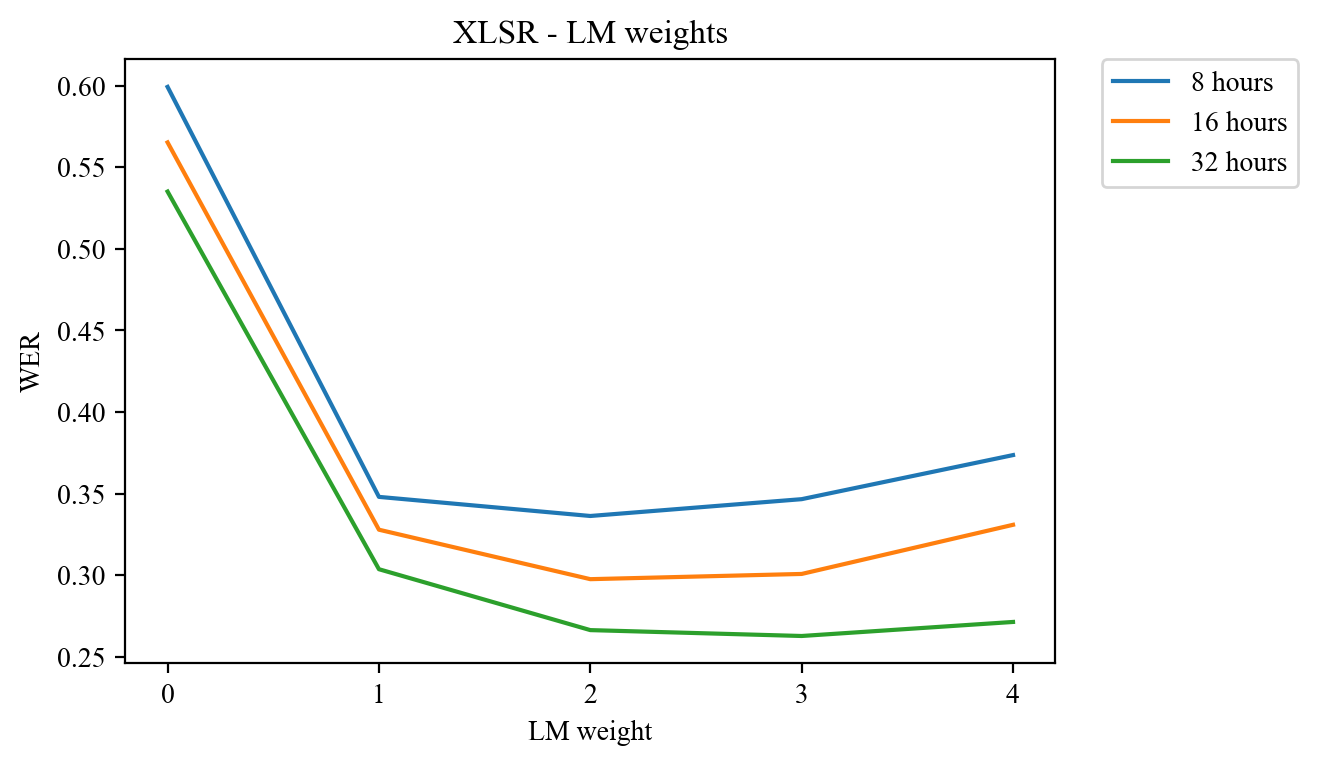

In [9]:
# Fine-tuning xlsr - different LM weights - WER

# old garbage
# testset: 'test'
# data = {
#         '8 hours': [0.6963392471112948, 0.37624344263104365, 0.3467389678870892, 0.33877298079706636, 0.3514536005340823],
#         '16 hours': [0.6645081139795997, 0.37090099214277134, 0.3299401487053767, 0.3226866753886695, 0.33754105735232176],
#         '32 hours': [0.6087193931924592, 0.3374441803407259, 0.2909081629766042, 0.2758174330712207, 0.2729826513891402]
#        }
# testset: 'test'
data = {
        '8 hours': [0.5991797539261778, 0.3480044013203961, 0.3363008902670801, 0.3466039811943583, 0.3736120836250875],
        '16 hours': [0.5651695508652596, 0.32789836951085327, 0.29758927678303493, 0.30079023707112135, 0.33089926978093426],
        '32 hours': [0.5350605181554466, 0.3036911073321997, 0.26637991397419225, 0.262778833650095, 0.2713814144243273]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
plt.title('XLSR - LM weights')
plt.xlabel('LM weight')
plt.ylabel('WER')
plt.xticks(list(range(5)), [0, 1, 2, 3, 4])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

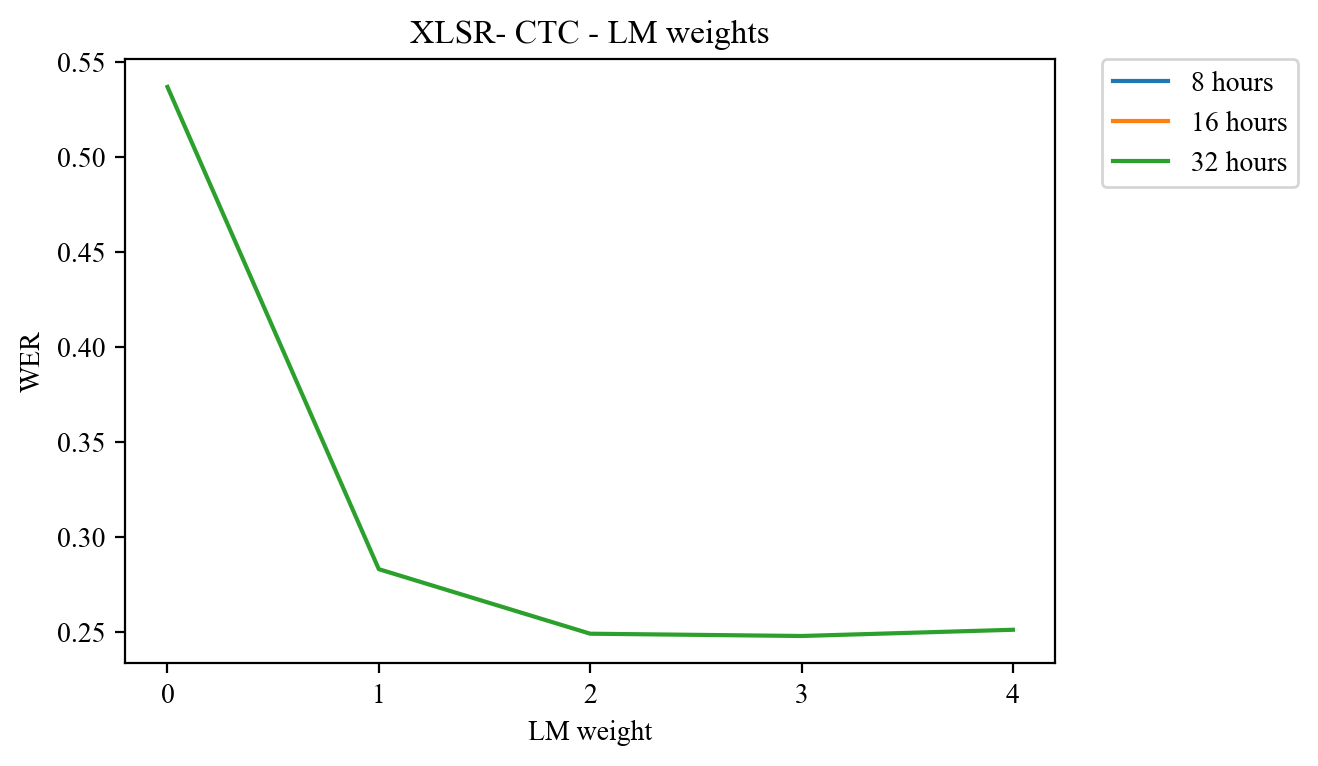

In [10]:
# Fine-tuning xlsr ctc - different LM weights - WER

# testset: 'ctc2tempdata/test'
data = {
        '8 hours': [],
        '16 hours': [],
        '32 hours': [0.5368145073192048, 0.2829364212366179, 0.24896220231592747, 0.24776054183963295, 0.25103779768407253]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
plt.title('XLSR- CTC - LM weights')
plt.xlabel('LM weight')
plt.ylabel('WER')
plt.xticks(list(range(5)), [0, 1, 2, 3, 4])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

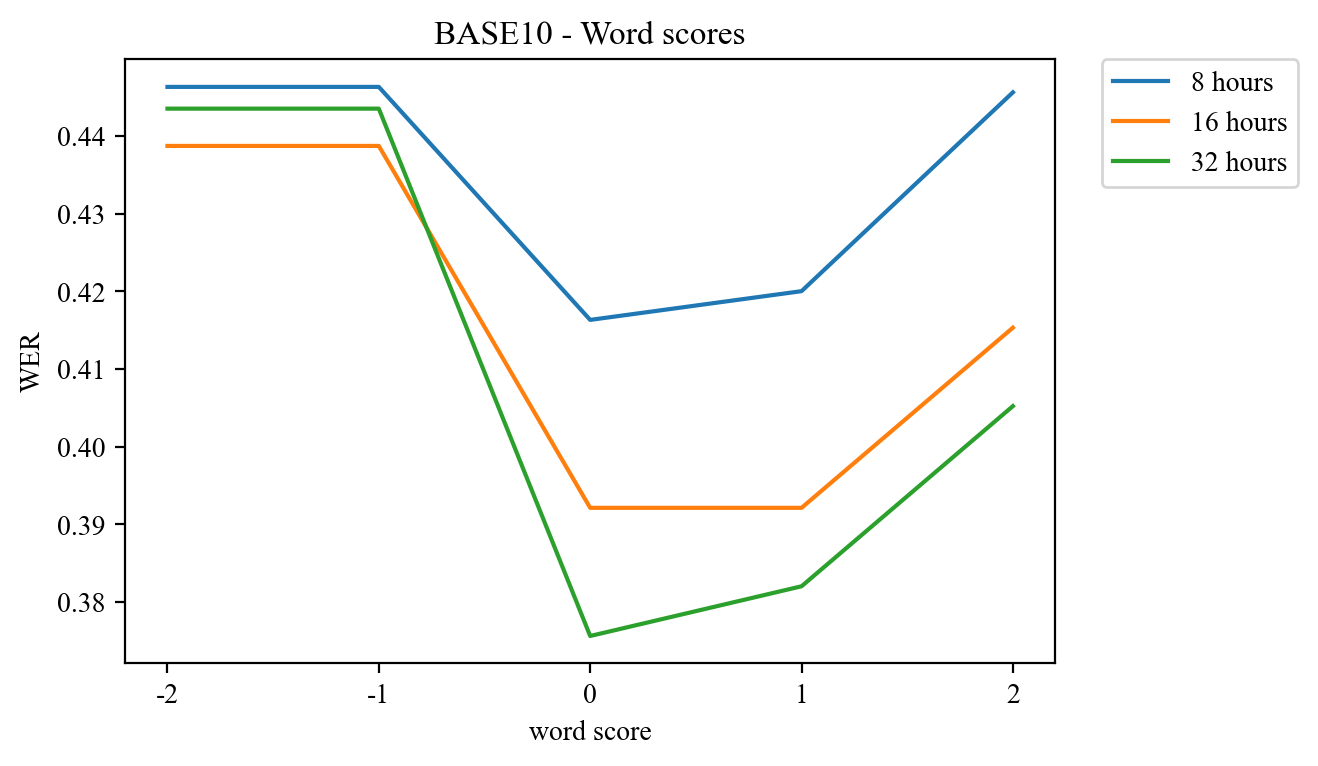

In [11]:
# Fine-tuning base10 - different word scores - WER

# old garbage
# testset: 'test'
# data = {
#         '8 hours': [0.4312308786641041, 0.4056876739594236, 0.4040174476371503, 0.41233950446411727, 0.4390619509242079],
#         '16 hours': [0.4241463660812583, 0.3949950689869304, 0.3817633490700113, 0.3853108197624748, 0.40831050499950594],
#         '32 hours': [0.42679490237207707, 0.3860400177398728, 0.36327317502963746, 0.37090529099844527, 0.39761084017397336]
#        } 
# testset: 'test'
data = {
        '8 hours': [0.44633390017005103, 0.44633390017005103, 0.4163248974692408, 0.42002600780234073, 0.44563369010703213],
        '16 hours': [0.43873161948584577, 0.43873161948584577, 0.3921176352905872, 0.3921176352905872, 0.4153245973792138],
        '32 hours': [0.44353305991797537, 0.44353305991797537, 0.37561268380514157, 0.3820146043813144, 0.405221566469941]
       } 
fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
plt.title('BASE10 - Word scores')
plt.xlabel('word score')
plt.ylabel('WER')
plt.xticks(list(range(5)), [-2, -1, 0, 1, 2])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

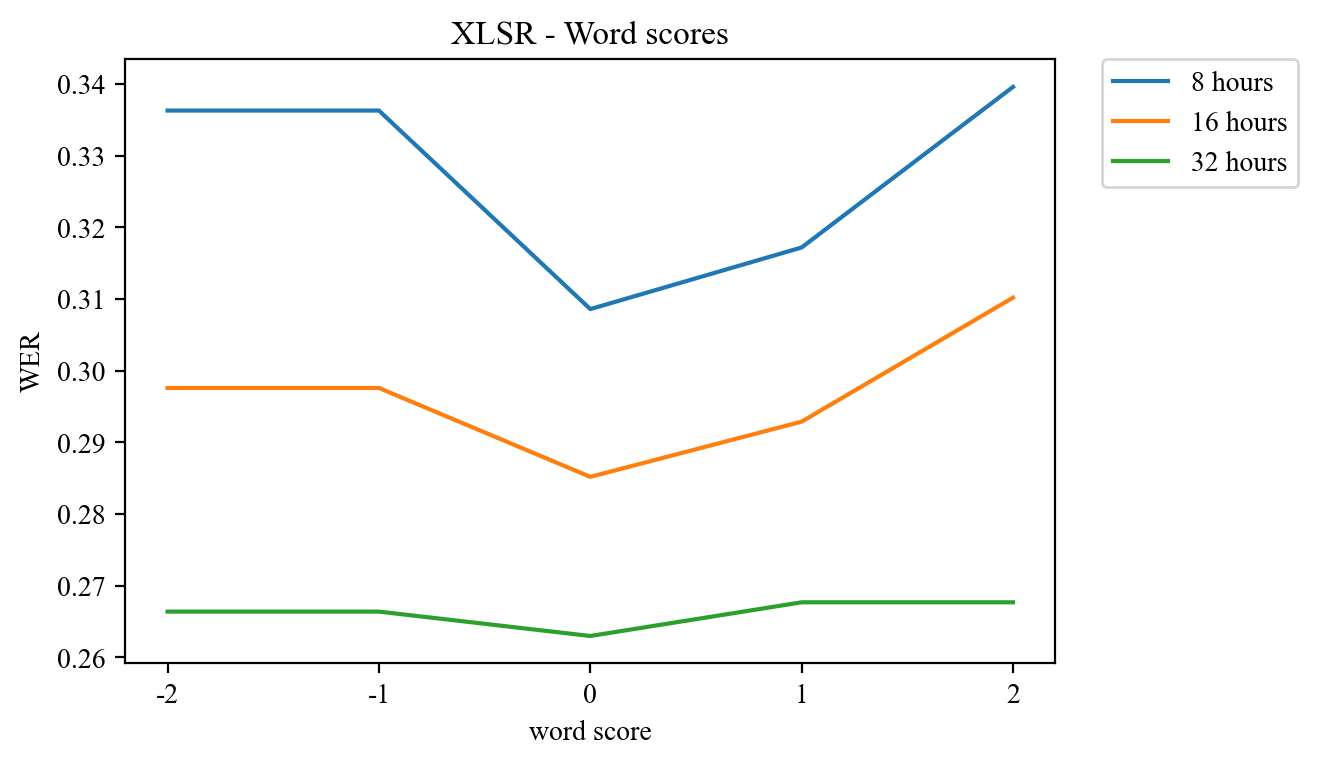

In [18]:
# Fine-tuning xlsr - different word scores - WER

# old garbage
# testset: 'test'
# data = {
#         '8 hours': [0.352854446488004, 0.3467389678870892, 0.3438462381980294, 0.3601868959505617, 0.39659838720409396],
#         '16 hours': [0.332518563361415, 0.3299401487053767, 0.33363667681442516, 0.3473113137938323, 0.3717126461653541],
#         '32 hours': [0.2918336312950643, 0.2909081629766042, 0.2955821695328123, 0.30419611652998246, 0.33342532042794876]
#        }
# testset: 'test'
data = {
        '8 hours': [0.3363008902670801, 0.3363008902670801, 0.308592577773332, 0.31719515854756425, 0.33960188056416923],
        '16 hours': [0.29758927678303493, 0.29758927678303493, 0.2851855556667, 0.292887866359908, 0.3101930579173752],
        '32 hours': [0.26637991397419225, 0.26637991397419225, 0.26297889366810046, 0.2676803040912274, 0.2676803040912274]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
plt.title('XLSR - Word scores')
plt.xlabel('word score')
plt.ylabel('WER')
plt.xticks(list(range(5)), [-2, -1, 0, 1, 2])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

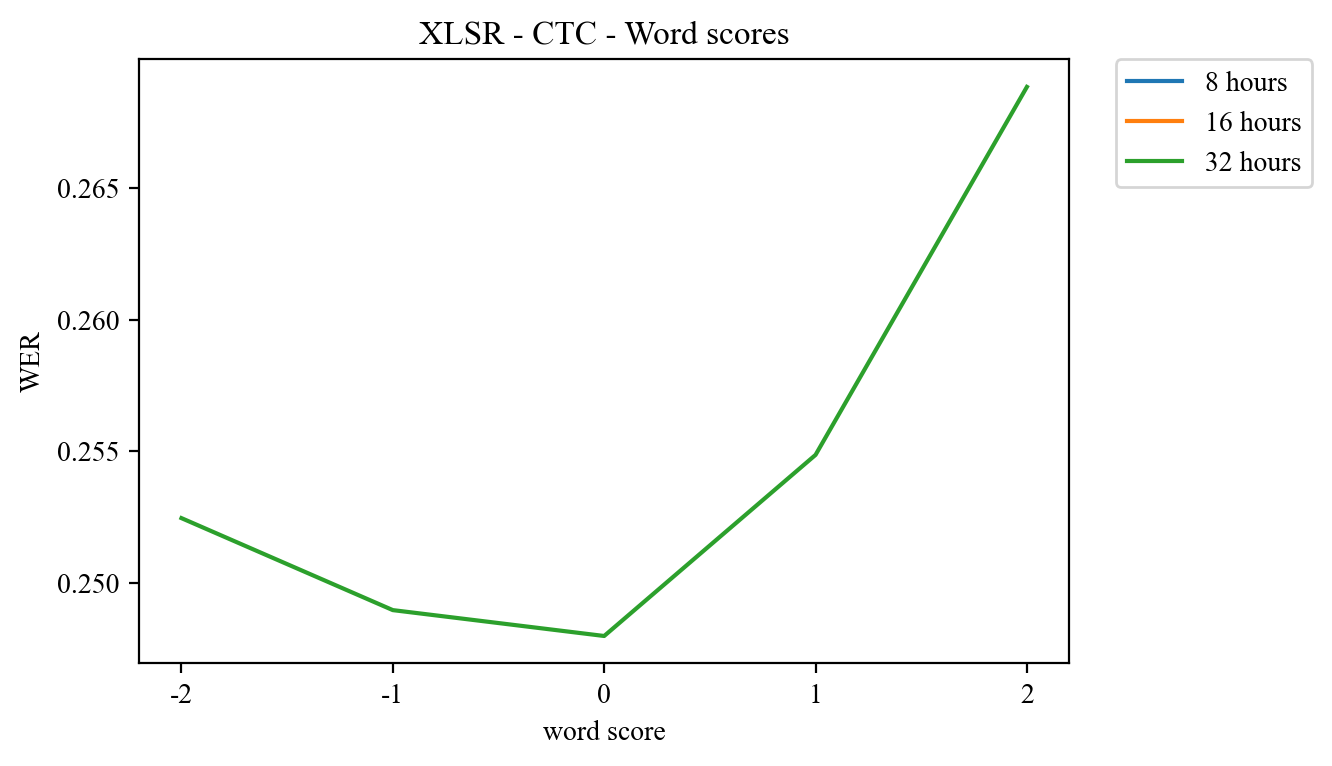

In [13]:
# Fine-tuning xlsr - ctc - different word scores - WER

# testset: 'test'
data = {
        '8 hours': [],
        '16 hours': [],
        '32 hours': [0.2524579418833297, 0.24896220231592747, 0.24797902556259557, 0.2548612628359187, 0.26884422110552764]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
plt.title('XLSR - CTC - Word scores')
plt.xlabel('word score')
plt.ylabel('WER')
plt.xticks(list(range(5)), [-2, -1, 0, 1, 2])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

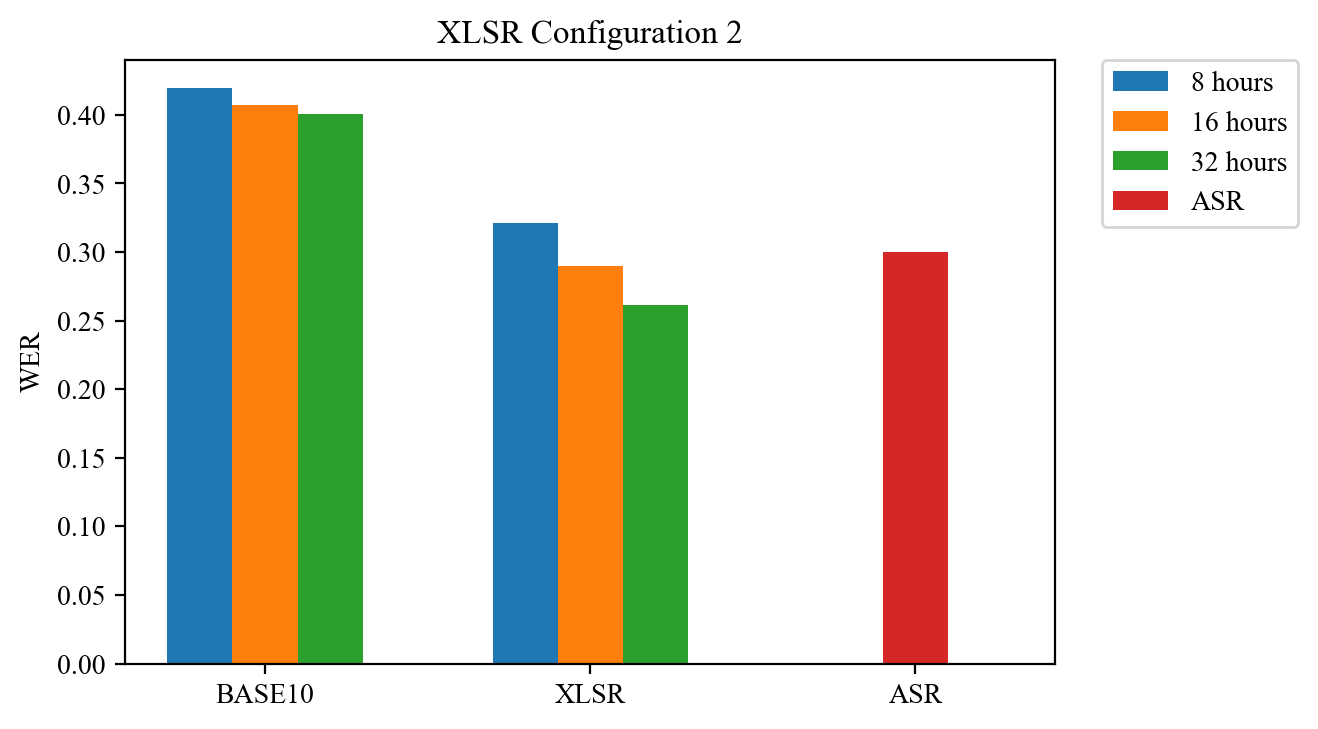

In [17]:
data = {
        '8 hours': [0.41932579773932177, 0.3213964189256777, 0], 
        '16 hours': [0.4070221066319896, 0.28978693608082423, 0], 
        '32 hours': [0.40082024607382216, 0.26147844353305993, 0]
       }
data_asr = {'ASR': [0.3334000200060018, 0, 0]}

labels = ['BASE10', 'XLSR', 'ASR']
colors = ['r', 'g', 'b']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)
    
# for i, key in enumerate(data_asr):
#     offsets = x - width + (i*width)
#     ax.bar(offsets, data_asr[key], width, label=key)

ax.bar([2, 0, 0], [0.3, 0, 0], width, label='ASR')

ax.set_ylabel('WER')
ax.set_title('XLSR Configuration 2')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

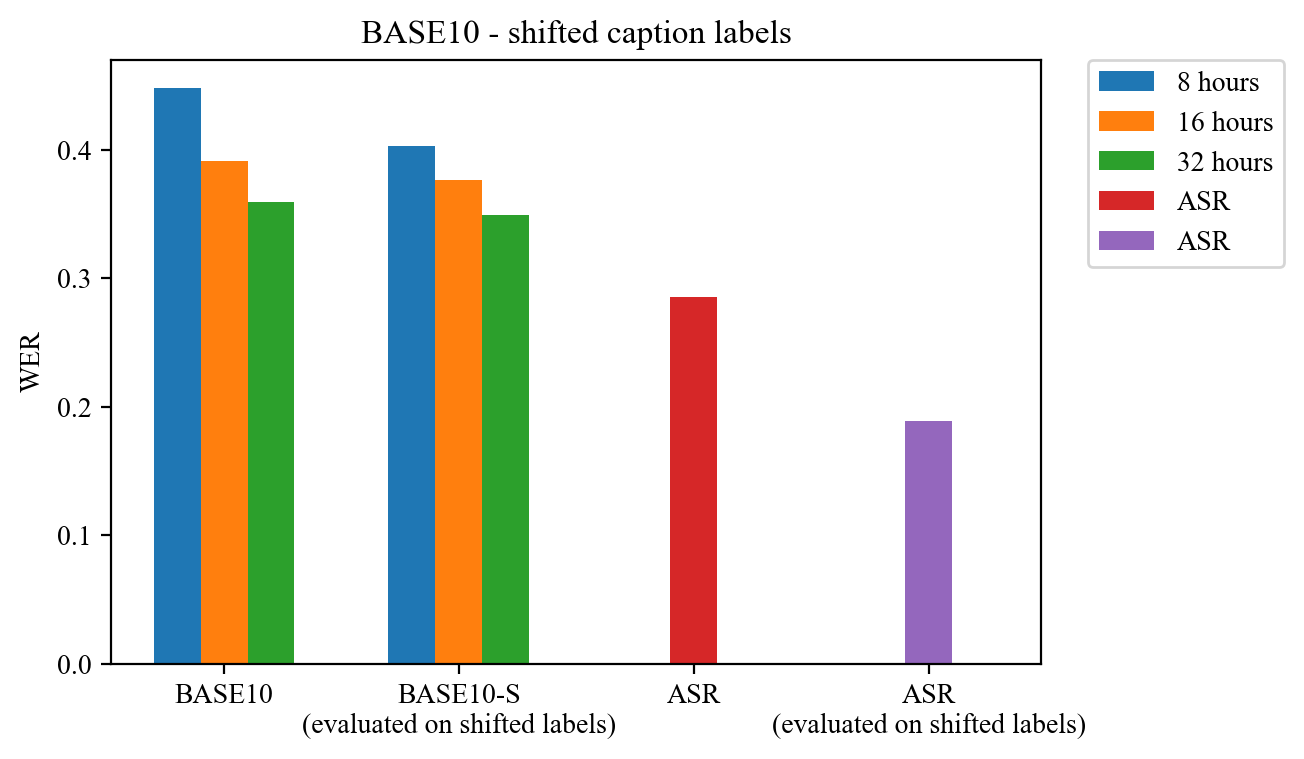

In [46]:
# old garbage
# c2tempdata
# data = {
#         '8 hours': [0.4056876739594236, 0.4168422158694568, 0], 
#         '16 hours': [0.3949950689869304, 0.4191991132131658, 0], 
#         '32 hours': [0.3860400177398728, 0.39814813124083154, 0]
#        }
# c2tempdata
data = {
        '8 hours': [0.4478343503050915, 0.4029932270045882, 0, 0], 
        '16 hours': [0.39091727518255476, 0.3764474546646275, 0, 0], 
        '32 hours': [0.3592077623286986, 0.3492462311557789, 0, 0]
       }

labels = ['BASE10', 'BASE10-S\n(evaluated on shifted labels)', 'ASR', 'ASR\n(evaluated on shifted labels)']
colors = ['r', 'g', 'b']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)
    
# for i, key in enumerate(data_asr):
#     offsets = x - width + (i*width)
#     ax.bar(offsets, data_asr[key], width, label=key)

ax.bar([2, 0, 0], [0.2857142857142857, 0, 0], width, label='ASR')
ax.bar([3, 0, 0], [0.18898842036268299, 0, 0], width, label='ASR')

ax.set_ylabel('WER')
ax.set_title('BASE10 - shifted caption labels')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

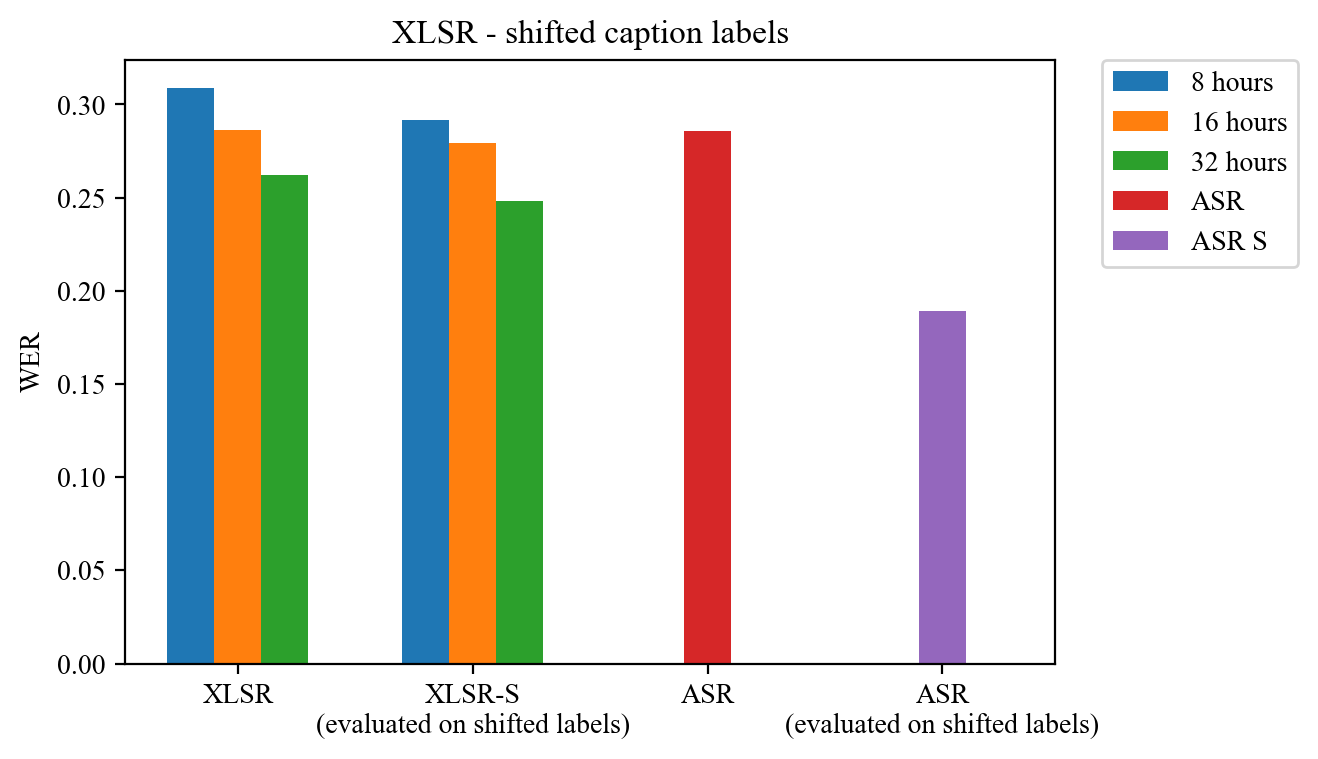

In [47]:
# c2tempdata
data = {
        '8 hours': [0.3086926077823347, 0.2917850120166048, 0, 0], 
        '16 hours': [0.2864859457837351, 0.27933143980773434, 0, 0], 
        '32 hours': [0.26217865359607884, 0.24819750928555823, 0, 0]
       }

labels = ['XLSR', 'XLSR-S\n(evaluated on shifted labels)', 'ASR', 'ASR\n(evaluated on shifted labels)']
colors = ['r', 'g', 'b']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)
    
# for i, key in enumerate(data_asr):
#     offsets = x - width + (i*width)
#     ax.bar(offsets, data_asr[key], width, label=key)

ax.bar([2, 0, 0, 0], [0.2857142857142857, 0, 0, 0], width, label='ASR')
ax.bar([3, 0, 0, 0], [0.18898842036268299, 0, 0, 0], width, label='ASR S')

ax.set_ylabel('WER')
ax.set_title('XLSR - shifted caption labels')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()